In [1]:
import requests
import pandas
import time
import numpy as np
from bs4 import BeautifulSoup
from datetime import date
#import tweepy
#import schedule
import os
from os import environ
from secrets import *

In [2]:
URL = "https://www.worldometers.info/coronavirus/"
parsed_html = requests.get(URL)
soup = BeautifulSoup(parsed_html.content, "html.parser")

<bound method Tag.prettify of 
<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 24,741,651 Cases and 837,790 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" size
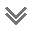

In [3]:
print(soup.prettify)

In [4]:
box_d = soup.find_all('button', class_='btn btn-light date-btn')

i = 1
date = []
for x in box_d:
    date.append(x.text+str('2020'))
    
date = date[0]

print(date)

August 27 2020


In [5]:
#results = soup.find(id_='main_table_countries_today')
box=soup.find_all('table')

In [6]:
results = box[1]
print(results)

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_yesterday" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl<div class="info_tooltip" data-container="body" data-placement="bottom" data-toggle="tooltip" title="1 Case every X people"><i class="fa fa-info-circle"></i></div></th><th

In [7]:
content_1 = results.find_all('th')
for x in content_1:
    print(x.text)

#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent
1 Caseevery X ppl
1 Deathevery X ppl
1 Testevery X ppl


In [8]:
content = results.find_all('td')
# print(content)

In [15]:
Country         = []
Total_Cases     = []
New_Cases       = []
Total_Deaths    = []
New_Deaths      = []
Total_Recovered = []

Active_Cases    = []
Critical        = []
Tot_Cases_1M_pop= []
Deaths_1M_pop   = []
TotalTests      = []

Tests_1M_pop    = []

Population      = []   
Continent       = []
rem = 1
x = 1
y = 1

z = 20

for entries in content:
    if x>=154:
        #print(x, '  ',y, ' ',entries.text.strip())
        if(y==1):
            Country.append(entries.text.strip())
        if(y==2):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                Total_Cases.append(np.nan)
            else:
                Total_Cases.append(entries.text.strip())
        if(y==3):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                New_Cases.append(np.nan)
            else:
                New_Cases.append(entries.text.strip())
        if(y==4):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                Total_Deaths.append(np.nan)
            else:
                Total_Deaths.append(entries.text.strip())
        if(y==5):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                New_Deaths.append(np.nan)
            else:
                New_Deaths.append(entries.text.strip())
        if(y==6):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                Total_Recovered.append(np.nan)
            else:
                Total_Recovered.append(entries.text.strip())
        if(y==8):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                Active_Cases.append(np.nan)
            else:
                Active_Cases.append(entries.text.strip())
        if(y==9):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                Critical.append(np.nan)
            else:
                Critical.append(entries.text.strip())
        if(y==10):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                Tot_Cases_1M_pop.append(np.nan)
            else:
                Tot_Cases_1M_pop.append(entries.text.strip())
        if(y==11):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                Deaths_1M_pop.append(np.nan)
            else:
                Deaths_1M_pop.append(entries.text.strip())
        if(y==12):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                TotalTests.append(np.nan)
            else:
                TotalTests.append(entries.text.strip())
        if(y==13):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                Tests_1M_pop.append(np.nan)
            else:
                Tests_1M_pop.append(entries.text.strip())
        if(y==14):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                Population.append(np.nan)
            else:
                Population.append(entries.text.strip())
        if(y==15):
            if(len(entries.text.strip()))==0 or entries.text.strip() =='N/A':
                Continent.append(np.nan)
            else:
                Continent.append(entries.text.strip())
        
            
        y+=1
        if y==z:
            y=1
            if(z%2 !=0):
                z -=1
    x+=1

In [16]:
import pandas as pd

In [17]:
type(Country)

list

In [18]:
# Country         = []
# Total_Cases     = []
# New_Cases       = []
# Total_Deaths    = []
# New_Deaths      = []
# Total_Recovered = []
# New_Recovered   = []


# Active_Cases    = []
# Critical        = []
# Tot_Cases_1M_pop = []
# Deaths_1M_pop   = []
# TotalTests      = []

# Tests_1M_pop    = []

# Population      = []  

In [19]:
column =['Country','Total_Cases','New_Cases','Total_Deaths', 'New_Deaths', 'Total_Recovered',
        'Active_Cases','Critical','Tot_Cases_1M_pop','Deaths_1M_pop','TotalTests','Tests_1M_pop','Population','Continent']
data    =[[Country,Total_Cases,New_Cases,Total_Deaths, New_Deaths, Total_Recovered,
        Active_Cases,Critical,Tot_Cases_1M_pop,Deaths_1M_pop,TotalTests,Tests_1M_pop,Population]]

final_data = pd.DataFrame(list(zip(Country,Total_Cases,New_Cases,Total_Deaths, New_Deaths, Total_Recovered,
        Active_Cases,Critical,Tot_Cases_1M_pop,Deaths_1M_pop,TotalTests,Tests_1M_pop,Population,Continent)), columns =column)

final_data['date']=date

In [20]:
# final_data = Country
final_data.head(10)

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Critical,Tot_Cases_1M_pop,Deaths_1M_pop,TotalTests,Tests_1M_pop,Population,Continent,date
0,China,"85,004",+8,"4,634",NaN,"80,046",324,5,59,3,"90,410,000","62,814","1,439,323,776",Asia,August 27 2020
1,USA,"6,046,634","+46,286","184,796","+1,143","3,347,940","2,513,898","16,231","18,251",558,"79,472,486","239,874","331,309,290",North America,August 27 2020
2,Brazil,"3,764,493","+42,489","118,726",+970,"2,947,250","698,517","8,318","17,691",558,"14,172,764","66,602","212,797,254",South America,August 27 2020
3,India,"3,384,575","+76,826","61,694","+1,065","2,583,063","739,818","8,944","2,449",45,"38,576,510","27,911","1,382,122,843",Asia,August 27 2020
4,Russia,"975,576","+4,711","16,804",+121,"792,561","166,211","2,300","6,685",115,"35,400,000","242,558","145,944,502",Europe,August 27 2020
5,Peru,"621,997","+8,619","28,277",+153,"429,662","164,058","1,526","18,824",856,"3,089,459","93,499","33,042,679",South America,August 27 2020
6,South Africa,"618,286","+2,585","13,628",+126,"531,338","73,320",539,"10,405",229,"3,617,982","60,884","59,424,468",Africa,August 27 2020
7,Colombia,"582,022","+9,752","18,468",+284,"417,793","145,761","1,493","11,420",362,"2,619,712","51,400","50,967,362",South America,August 27 2020
8,Mexico,"573,888","+5,267","62,076",+626,"396,758","115,054","3,305","4,444",481,"1,291,083","9,997","129,143,835",North America,August 27 2020
9,Spain,"451,792","+3,781","28,996",+25,NaN,NaN,715,"9,662",620,"8,517,446","182,161","46,757,684",Europe,August 27 2020


In [22]:
final_data.to_csv(str(date)+' wordo_meter_all_countries_data.csv', index=False)